In [ ]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [7]:
df_sample = df[['job_title_short','job_skills']].head(5)
df_sample

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [11]:
df_sample.explode('job_skills').head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,r
1,Data Analyst,python
1,Data Analyst,sql
1,Data Analyst,nosql


In [14]:
df_exploded = df.explode('job_skills')

<Axes: ylabel='job_skills'>

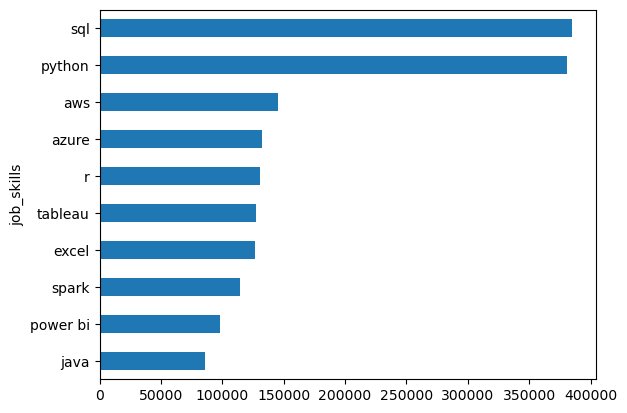

In [19]:
df_exploded['job_skills'].value_counts().head(10).sort_values().plot(kind='barh')

In [21]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()

In [23]:
df_skills_count = skills_count.reset_index(name='skill_count')

In [ ]:
df_skills_count = df_skills_count.sort_values('skill_count', ascending=False)
df_skills_count


,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
719,Data Engineer,dingtalk,1
567,Data Analyst,nuxt.js,1
2241,Software Engineer,visualbasic,1
1413,Senior Data Analyst,drupal,1


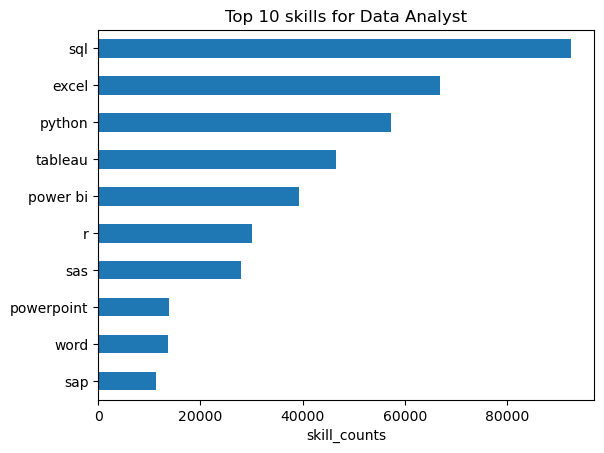

In [ ]:
job_title = 'Data Analyst'
top_skills = 10

df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skills_final.plot(kind='barh', x='job_skills',y='skill_count')
plt.gca().invert_yaxis() # graph replacement for sorting in graph
plt.title(f'Top {top_skills} skills for {job_title}')
plt.ylabel('')
plt.xlabel('skill_counts')
plt.legend().set_visible(False)
plt.show()